<a href="https://colab.research.google.com/github/951237/TIL/blob/master/TIL_200524_%EC%9A%B0%EB%A6%AC%EB%8F%99%EB%84%A4_%EC%9D%B8%EA%B5%AC_%EC%8B%9C%EA%B0%81%ED%99%94_%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 우리동네 인구 시각화 하기

In [0]:
import csv
import matplotlib.pyplot as plt

In [0]:
F_URL = '/content/drive/My Drive/data/dataset/연령별인구_2004.csv'
f = open(F_URL, 'r', encoding = 'cp949')
data = csv.reader(f)

[129, 170, 189, 218, 207, 208, 174, 170, 163, 149, 142, 95, 109, 104, 70, 79, 70, 53, 89, 114, 118, 147, 121, 103, 116, 108, 122, 109, 110, 128, 135, 135, 171, 156, 215, 242, 301, 325, 290, 296, 265, 214, 218, 210, 187, 161, 168, 138, 143, 132, 129, 139, 130, 123, 115, 131, 83, 104, 107, 113, 89, 92, 60, 68, 42, 54, 36, 24, 25, 22, 16, 19, 15, 8, 4, 9, 6, 6, 10, 8, 3, 8, 1, 2, 2, 5, 3, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


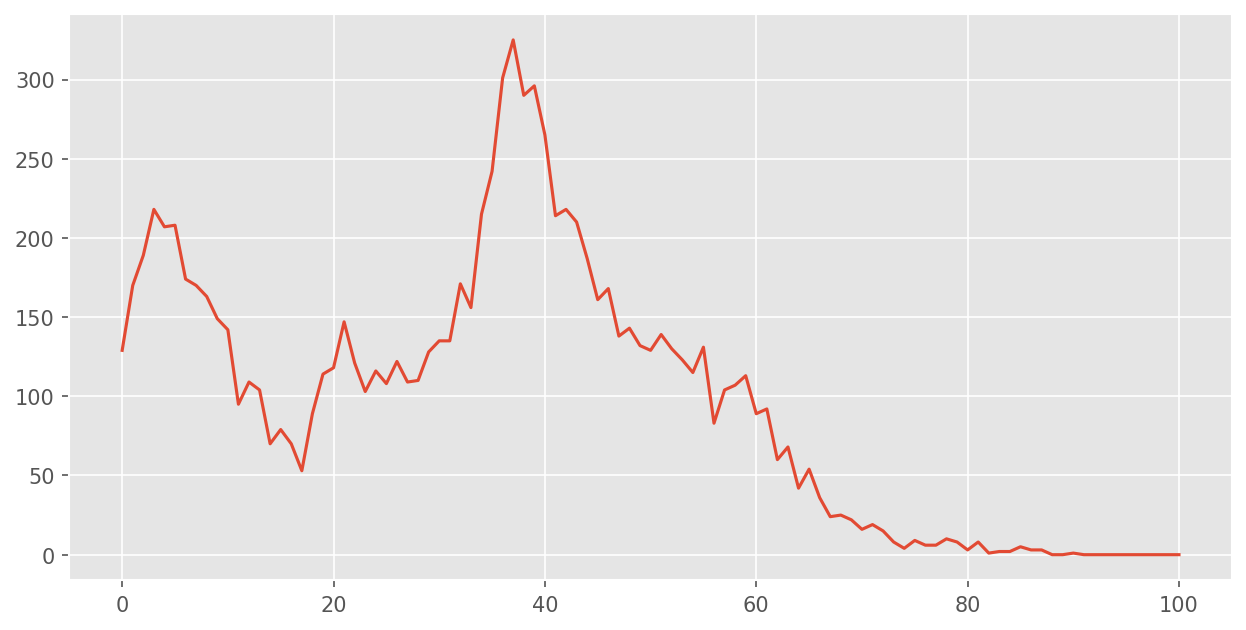

In [20]:
# 남자연령구간 : 3~ 104
# 여자연령구간 : 107 ~ 208
result = []
for row in data:
    if '새솔동' in row[0]:
        for i in row[3:104]: 
            result.append(int(i.replace(',','')))

print(result)
plt.style.use('ggplot')
plt.figure(figsize = (10, 5), dpi = 150)
plt.plot(result)
plt.show()

[171, 197, 181, 211, 239, 189, 182, 180, 141, 132, 111, 118, 111, 71, 70, 64, 67, 66, 92, 109, 98, 115, 105, 97, 105, 104, 98, 151, 126, 137, 163, 177, 203, 228, 238, 247, 311, 282, 260, 237, 204, 175, 146, 150, 150, 161, 171, 160, 157, 136, 162, 136, 119, 111, 121, 82, 129, 95, 101, 79, 78, 65, 45, 37, 55, 23, 30, 19, 8, 13, 16, 15, 24, 12, 9, 9, 14, 8, 4, 14, 9, 9, 7, 8, 6, 8, 7, 7, 5, 2, 2, 3, 4, 0, 1, 0, 1, 1, 1, 0]


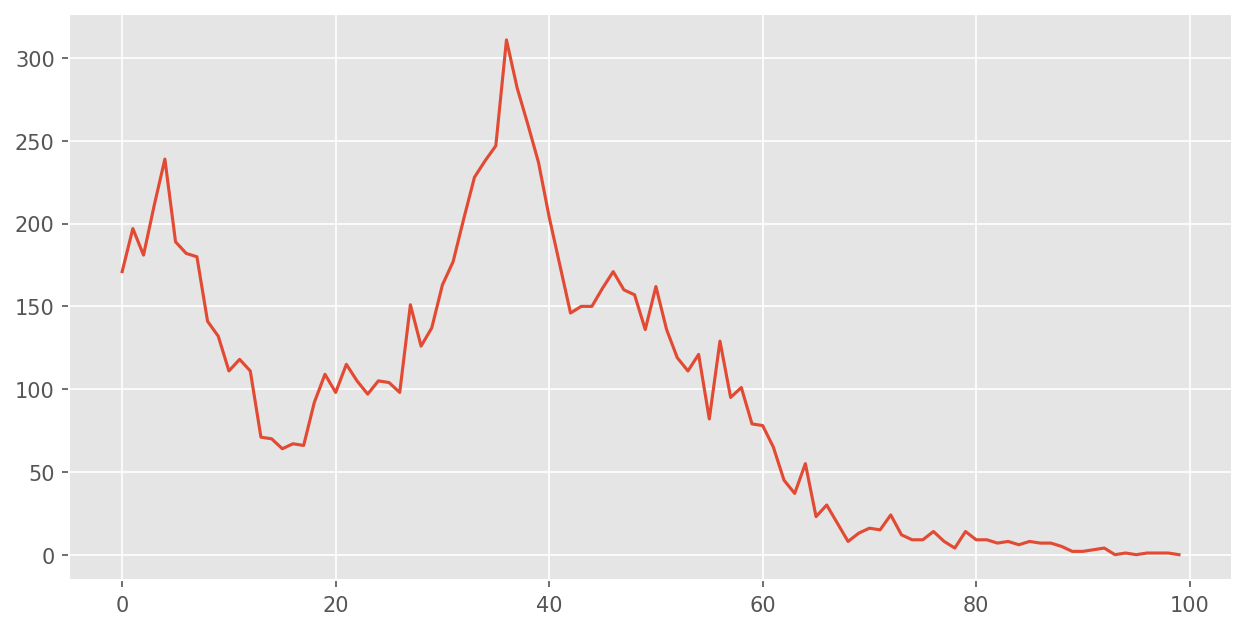

In [26]:
# 남자연령구간 : 3~ 104
# 여자연령구간 : 107 ~ 208
result = []
for row in data:
    if '새솔동' in row[0]:
        for i in row[107:208]: 
            result.append(int(i.replace(',','')))

print(result)
plt.style.use('ggplot')
plt.figure(figsize = (10, 5), dpi = 150)
plt.plot(result)
plt.show()

### 원하는 지역의 입력을 받아서 인구 시각화 하기

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해 주세요 : 예천읍
[65, 66, 69, 87, 87, 93, 92, 128, 109, 108, 130, 126, 121, 120, 120, 118, 128, 147, 184, 164, 146, 179, 160, 157, 146, 135, 142, 108, 118, 115, 120, 92, 122, 93, 120, 139, 148, 162, 133, 200, 197, 169, 180, 195, 169, 225, 213, 194, 218, 214, 230, 226, 220, 269, 254, 249, 283, 285, 331, 314, 312, 292, 295, 311, 308, 234, 276, 275, 216, 220, 213, 238, 211, 90, 140, 171, 216, 177, 174, 166, 159, 123, 135, 136, 120, 93, 67, 69, 41, 40, 34, 30, 25, 22, 17, 10, 7, 4, 1, 3, 3]


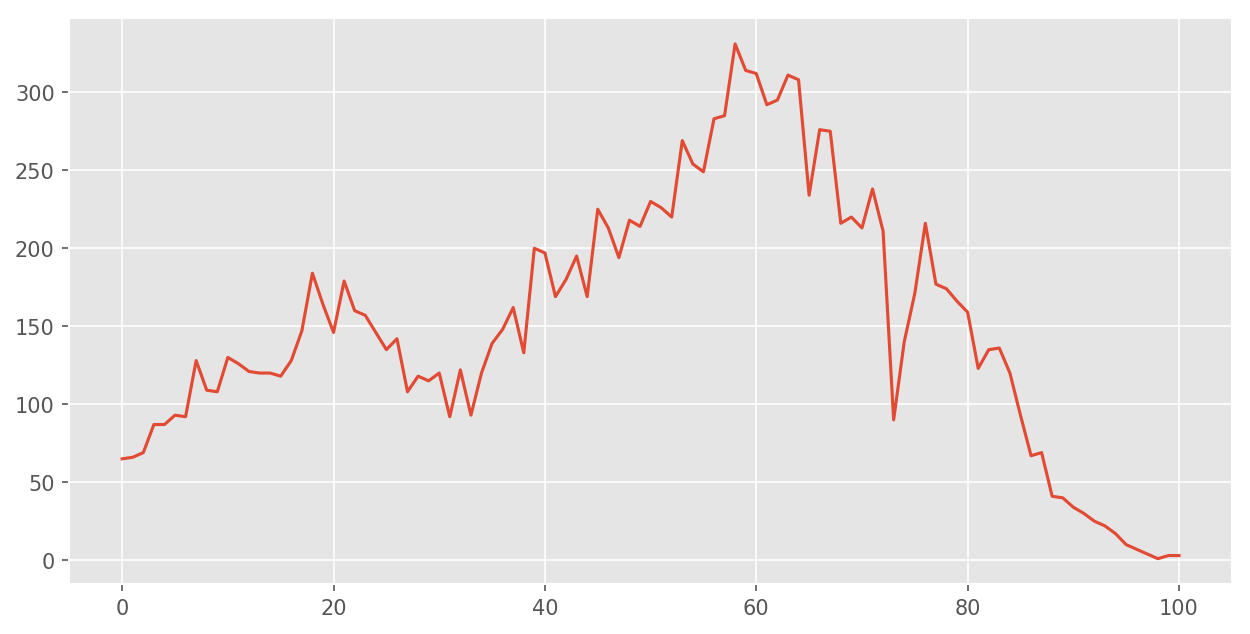

In [0]:
import csv
import matplotlib.pyplot as plt

f = open('/gdrive/My Drive/data/age06.csv', 'r', encoding = 'cp949')
data = csv.reader(f)
result = []

i_a = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해 주세요 : ')

for row in data:
    if i_a  in row[0]:
        for i in row[3:]:
            result.append(int(i.replace(',','')))

print(result)
plt.style.use('ggplot')
plt.figure(figsize = (10, 5), dpi = 150)
plt.plot(result)
plt.show()